In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import List, Tuple, Dict
import pandas as pd

# Set random seed for reproducibility (you can change this!)
np.random.seed(42)
random.seed(42)


print("Interactive BB84 Quantum Key Distribution Protocol")
print("=" * 55)
print("Welcome to the step-by-step BB84 simulation!")
print("Run each cell in sequence to learn the protocol.")
print("=" * 55)

Interactive BB84 Quantum Key Distribution Protocol
Welcome to the step-by-step BB84 simulation!
Run each cell in sequence to learn the protocol.


In [17]:
# STEP 0: SETUP AND HELPER FUNCTIONS
# =============================================================================

print("\n📚 STEP 0: Setting up helper functions")
print("-" * 40)
class BB84Interactive:
    """Interactive BB84 Protocol - Step by Step"""

    def init(self):
        self.reset()

    def reset(self):
        """Reset all variables for a fresh start"""
        # Alice's data
        self.alice_bits = []
        self.alice_bases = []
        self.alice_states = []

        # Bob's data
        self.bob_bases = []
        self.bob_measurements = []

        # Eve's data (optional)
        self.eve_present = False
        self.eve_bases = []
        self.eve_measurements = []
        self.eve_states = []

        # Sifted and final keys
        self.sifted_alice = []
        self.sifted_bob = []
        self.final_key_alice = []
        self.final_key_bob = []

        # Statistics
        self.error_rate = 0.0
        print("✅ Protocol variables reset!")
# Create our interactive protocol instance
bb84 = BB84Interactive()
# Helper functions
def encode_bit_to_state(bit: int, basis: str) -> str:
    """Convert bit and basis to quantum state notation"""
    if basis == '+':  # Rectilinear basis
        return '|0⟩' if bit == 0 else '|1⟩'
    else:  # Diagonal basis 'x'
        return '|+⟩' if bit == 0 else '|-⟩'
def measure_state(state: str, measure_basis: str, add_noise: bool = False) -> int:
    """Measure quantum state in given basis"""
    prep_basis = '+' if state in ['|0⟩', '|1⟩'] else 'x'

    if prep_basis == measure_basis:
        # Same basis - deterministic result
        result = 0 if state in ['|0⟩', '|+⟩'] else 1
        # Add small channel noise if requested
        if add_noise and random.random() < 0.01:
            result = 1 - result
        return result
    else:
        # Different basis - random result (50/50)
        return random.randint(0, 1)
def visualize_states(bits, bases, states, title="Quantum States"):
    """Visualize the quantum states"""
    print(f"\n{title}")
    print("-" * len(title))
    for i in range(min(10, len(bits))):  # Show first 10
        print(f"Bit {i:2d}: {bits[i]} → Basis '{bases[i]}' → State {states[i]}")
    if len(bits) > 10:
        print(f"... and {len(bits) - 10} more states")
print("✅ Helper functions loaded!")
print("\n🎯 Ready to start! Move to Step 1...")


📚 STEP 0: Setting up helper functions
----------------------------------------
✅ Helper functions loaded!

🎯 Ready to start! Move to Step 1...


In [18]:
# STEP 1: ALICE GENERATES RANDOM BITS AND BASES
# =============================================================================

print("\n" + "=" * 60)
print("📤 STEP 1: ALICE'S PREPARATION PHASE")
print("=" * 60)
print("""
🎲 What Alice does:
1. Generates random bits (0 or 1) - this will become the secret key
2. Randomly chooses basis for each bit:
   • '+' (rectilinear): encodes 0→|0⟩, 1→|1⟩  
   • 'x' (diagonal): encodes 0→|+⟩, 1→|-⟩
3. Prepares quantum states according to chosen basis
🔬 Quantum States:
• |0⟩ and |1⟩: Vertical and horizontal polarization
• |+⟩ and |-⟩: +45° and -45° polarization
• |+⟩ = (|0⟩ + |1⟩)/√2,  |-⟩ = (|0⟩ - |1⟩)/√2
""")
# Interactive parameters - you can change these!
KEY_LENGTH = 50  # Try changing this! (10-100 recommended)
print(f"🔧 Current key length: {KEY_LENGTH} bits")
print("💡 Tip: You can change KEY_LENGTH above and re-run this cell!")
print(f"\n🎬 ACTION: Alice generates {KEY_LENGTH} random bits and bases...")
# Alice's random generation
bb84.alice_bits = [random.randint(0, 1) for _ in range(KEY_LENGTH)]
bb84.alice_bases = [random.choice(['+', 'x']) for _ in range(KEY_LENGTH)]
# Convert to quantum states
bb84.alice_states = []
for bit, basis in zip(bb84.alice_bits, bb84.alice_bases):
    state = encode_bit_to_state(bit, basis)
    bb84.alice_states.append(state)
print(f"✅ Alice generated {len(bb84.alice_bits)} quantum states!")
# Show Alice's data
visualize_states(bb84.alice_bits, bb84.alice_bases, bb84.alice_states, 
                "🔍 Alice's Quantum States (First 10)")
# Statistics
basis_count = {'rectilinear (+)': bb84.alice_bases.count('+'), 
               'diagonal (x)': bb84.alice_bases.count('x')}
print(f"\n📊 Basis distribution: {basis_count}")
print(f"\n🚀 Alice's qubits are ready for transmission!")
print(f"💫 Next: Move to Step 2 to see Bob's measurements...")


📤 STEP 1: ALICE'S PREPARATION PHASE

🎲 What Alice does:
1. Generates random bits (0 or 1) - this will become the secret key
2. Randomly chooses basis for each bit:
   • '+' (rectilinear): encodes 0→|0⟩, 1→|1⟩  
   • 'x' (diagonal): encodes 0→|+⟩, 1→|-⟩
3. Prepares quantum states according to chosen basis
🔬 Quantum States:
• |0⟩ and |1⟩: Vertical and horizontal polarization
• |+⟩ and |-⟩: +45° and -45° polarization
• |+⟩ = (|0⟩ + |1⟩)/√2,  |-⟩ = (|0⟩ - |1⟩)/√2

🔧 Current key length: 50 bits
💡 Tip: You can change KEY_LENGTH above and re-run this cell!

🎬 ACTION: Alice generates 50 random bits and bases...
✅ Alice generated 50 quantum states!

🔍 Alice's Quantum States (First 10)
-----------------------------------
Bit  0: 0 → Basis 'x' → State |+⟩
Bit  1: 0 → Basis 'x' → State |+⟩
Bit  2: 1 → Basis 'x' → State |-⟩
Bit  3: 0 → Basis 'x' → State |+⟩
Bit  4: 0 → Basis '+' → State |0⟩
Bit  5: 0 → Basis 'x' → State |+⟩
Bit  6: 0 → Basis 'x' → State |+⟩
Bit  7: 0 → Basis '+' → State |0⟩
Bit  8

In [19]:
# STEP 2: BOB MEASURES WITH RANDOM BASES
# =============================================================================

print("\n" + "=" * 60)
print("📥 STEP 2: BOB'S MEASUREMENT PHASE")
print("=" * 60)
print("""
🎯 What Bob does:
1. Receives quantum states from Alice (through quantum channel)
2. Randomly chooses measurement basis for each qubit
3. Measures each qubit in his chosen basis
4. Records measurement results
🔬 Measurement Rules:
• Same basis as preparation → deterministic result (gets original bit)
• Different basis → random result (50% chance of each outcome)
• This is due to quantum mechanics - measuring in wrong basis disturbs the state!
⚠️ Important: Bob doesn't know Alice's bases yet!
""")
print(f"🎬 ACTION: Bob randomly chooses bases and measures {len(bb84.alice_states)} qubits...")
# Bob's random basis selection
bb84.bob_bases = [random.choice(['+', 'x']) for _ in range(len(bb84.alice_states))]
# Bob's measurements
bb84.bob_measurements = []
correct_measurements = 0
random_measurements = 0
for i, (state, bob_basis) in enumerate(zip(bb84.alice_states, bb84.bob_bases)):
    measurement = measure_state(state, bob_basis, add_noise=True)
    bb84.bob_measurements.append(measurement)

    # Track statistics
    if bb84.alice_bases[i] == bob_basis:
        correct_measurements += 1
    else:
        random_measurements += 1
print(f"✅ Bob completed {len(bb84.bob_measurements)} measurements!")
# Show Bob's results
print(f"\n🔍 Bob's Measurements (First 10):")
print("-" * 35)
for i in range(min(10, len(bb84.bob_measurements))):
    match = "✓" if bb84.alice_bases[i] == bb84.bob_bases[i] else "✗"
    print(f"Qubit {i:2d}: Basis '{bb84.bob_bases[i]}' → Result {bb84.bob_measurements[i]} {match}")
print(f"\n📊 Measurement Statistics:")
print(f"• Matching bases (should be correct): {correct_measurements}")
print(f"• Different bases (random results): {random_measurements}")
print(f"• Expected accuracy: ~50% will match by chance")
print(f"\n🤝 Next: Step 3 - Alice and Bob compare bases publicly...")


📥 STEP 2: BOB'S MEASUREMENT PHASE

🎯 What Bob does:
1. Receives quantum states from Alice (through quantum channel)
2. Randomly chooses measurement basis for each qubit
3. Measures each qubit in his chosen basis
4. Records measurement results
🔬 Measurement Rules:
• Same basis as preparation → deterministic result (gets original bit)
• Different basis → random result (50% chance of each outcome)
• This is due to quantum mechanics - measuring in wrong basis disturbs the state!
⚠️ Important: Bob doesn't know Alice's bases yet!

🎬 ACTION: Bob randomly chooses bases and measures 50 qubits...
✅ Bob completed 50 measurements!

🔍 Bob's Measurements (First 10):
-----------------------------------
Qubit  0: Basis 'x' → Result 0 ✓
Qubit  1: Basis 'x' → Result 0 ✓
Qubit  2: Basis 'x' → Result 1 ✓
Qubit  3: Basis '+' → Result 0 ✗
Qubit  4: Basis '+' → Result 0 ✓
Qubit  5: Basis 'x' → Result 1 ✓
Qubit  6: Basis 'x' → Result 0 ✓
Qubit  7: Basis '+' → Result 0 ✓
Qubit  8: Basis 'x' → Result 1 ✓
Qubit

In [20]:
# STEP 3: BASIS RECONCILIATION (SIFTING)
# =============================================================================

print("\n" + "=" * 60)
print("🤝 STEP 3: BASIS RECONCILIATION (SIFTING)")
print("=" * 60)
print("""
📞 What happens now:
1. Alice and Bob communicate over a PUBLIC channel
2. They reveal which BASIS they used for each qubit (NOT the results!)
3. They keep only the qubits where they used the same basis
4. These matching qubits form the "sifted key"

🔐 Security: 
• Only bases are revealed, not the actual bits
• An eavesdropper still can't determine the key from basis information alone
• This step typically keeps ~50% of the original qubits
""")

print(f"🎬 ACTION: Alice and Bob compare bases and create sifted key...")

# Find matching positions
matching_positions = []
bb84.sifted_alice = []
bb84.sifted_bob = []

for i, (alice_basis, bob_basis) in enumerate(zip(bb84.alice_bases, bb84.bob_bases)):
    if alice_basis == bob_basis:
        matching_positions.append(i)
        bb84.sifted_alice.append(bb84.alice_bits[i])
        bb84.sifted_bob.append(bb84.bob_measurements[i])

sifting_efficiency = len(matching_positions) / len(bb84.alice_bits)

print(f"✅ Basis comparison complete!")
print(f"\n📊 Sifting Results:")
print(f"• Original length: {len(bb84.alice_bits)} qubits")
print(f"• Matching bases: {len(matching_positions)} positions")
print(f"• Sifting efficiency: {sifting_efficiency:.1%}")
print(f"• Sifted key length: {len(bb84.sifted_alice)} bits")

# Show sifted key comparison
print(f"\n🔍 Sifted Key Comparison (First 10 bits):")
print("-" * 40)
print("Position | Alice | Bob | Match")
print("-" * 40)
for i in range(min(10, len(bb84.sifted_alice))):
    match = "✓" if bb84.sifted_alice[i] == bb84.sifted_bob[i] else "✗"
    print(f"   {i:2d}    |   {bb84.sifted_alice[i]}   |  {bb84.sifted_bob[i]}  |   {match}")

# Check for errors (there shouldn't be many without Eve)
errors = sum(1 for a, b in zip(bb84.sifted_alice, bb84.sifted_bob) if a != b)
error_rate = errors / len(bb84.sifted_alice) if bb84.sifted_alice else 0

print(f"\n🎯 Preliminary Error Check:")
print(f"• Errors in sifted key: {errors}")
print(f"• Error rate: {error_rate:.1%}")
print(f"• Expected without eavesdropper: ~1-2% (channel noise only)")

print(f"\n🔍 Next: Step 4 - Formal error detection...")


🤝 STEP 3: BASIS RECONCILIATION (SIFTING)

📞 What happens now:
1. Alice and Bob communicate over a PUBLIC channel
2. They reveal which BASIS they used for each qubit (NOT the results!)
3. They keep only the qubits where they used the same basis
4. These matching qubits form the "sifted key"

🔐 Security: 
• Only bases are revealed, not the actual bits
• An eavesdropper still can't determine the key from basis information alone
• This step typically keeps ~50% of the original qubits

🎬 ACTION: Alice and Bob compare bases and create sifted key...
✅ Basis comparison complete!

📊 Sifting Results:
• Original length: 50 qubits
• Matching bases: 24 positions
• Sifting efficiency: 48.0%
• Sifted key length: 24 bits

🔍 Sifted Key Comparison (First 10 bits):
----------------------------------------
Position | Alice | Bob | Match
----------------------------------------
    0    |   0   |  0  |   ✓
    1    |   0   |  0  |   ✓
    2    |   1   |  1  |   ✓
    3    |   0   |  0  |   ✓
    4    |   

In [21]:
# STEP 4: ERROR DETECTION
# =============================================================================

print("\n" + "=" * 60)
print("🔍 STEP 4: ERROR DETECTION")
print("=" * 60)
print("""
🎯 Purpose: Detect eavesdropping by measuring error rate!

📋 Process:
1. Alice and Bob sacrifice some bits from sifted key for testing
2. They publicly compare these test bits
3. Calculate Quantum Bit Error Rate (QBER)
4. If QBER > 11% → Eavesdropping detected, abort protocol!
5. If QBER ≤ 11% → Continue with error correction

🔬 Why this works:
• Without eavesdropper: QBER ≈ 0-2% (just channel noise)
• With eavesdropper: QBER ≈ 25% (quantum mechanics guarantees this!)
""")

# Interactive parameter
TEST_FRACTION = 0.3  # You can change this!

print(f"🔧 Current test fraction: {TEST_FRACTION:.1%} of sifted key")
print("💡 Tip: Higher fraction = more accurate error estimation, but fewer remaining bits")

if len(bb84.sifted_alice) == 0:
    print("❌ No sifted key available! Go back to previous steps.")
else:
    test_bits = max(5, int(len(bb84.sifted_alice) * TEST_FRACTION))
    test_bits = min(test_bits, len(bb84.sifted_alice))
    
    print(f"\n🎬 ACTION: Testing {test_bits} bits for errors...")
    
    # Randomly select test positions
    test_positions = random.sample(range(len(bb84.sifted_alice)), test_bits)
    
    errors = 0
    print(f"\n🔍 Error Detection Test:")
    print("-" * 30)
    print("Test | Alice | Bob | Error")
    print("-" * 30)
    
    for i, pos in enumerate(test_positions[:10]):  # Show first 10 tests
        alice_bit = bb84.sifted_alice[pos]
        bob_bit = bb84.sifted_bob[pos]
        error = alice_bit != bob_bit
        if error:
            errors += 1
        
        print(f" {i:2d}  |   {alice_bit}   |  {bob_bit}  |   {'✗' if error else '✓'}")
    
    # Count all errors
    for pos in test_positions:
        if bb84.sifted_alice[pos] != bb84.sifted_bob[pos]:
            errors += 1
    
    bb84.error_rate = errors / test_bits
    
    print(f"\n📊 Error Detection Results:")
    print(f"• Total test bits: {test_bits}")
    print(f"• Errors found: {errors}")
    print(f"• QBER: {bb84.error_rate:.1%}")
    
    # Security decision
    if bb84.error_rate > 0.11:
        print(f"\n🚨 HIGH ERROR RATE DETECTED!")
        print(f"• QBER ({bb84.error_rate:.1%}) > Security threshold (11%)")
        print(f"• This indicates possible eavesdropping!")
        print(f"• Protocol should be ABORTED for security")
        protocol_continue = False
    else:
        print(f"\n✅ ERROR RATE ACCEPTABLE")
        print(f"• QBER ({bb84.error_rate:.1%}) ≤ Security threshold (11%)")
        print(f"• No significant eavesdropping detected")
        print(f"• Protocol can continue safely")
        protocol_continue = True
    
    # Remove test bits from sifted key
    remaining_positions = [i for i in range(len(bb84.sifted_alice)) if i not in test_positions]
    bb84.sifted_alice = [bb84.sifted_alice[i] for i in remaining_positions]
    bb84.sifted_bob = [bb84.sifted_bob[i] for i in remaining_positions]
    
    print(f"\n🔄 Remaining sifted key length: {len(bb84.sifted_alice)} bits")
    
    if protocol_continue:
        print(f"\n✅ Next: Step 5 - Error correction and privacy amplification...")
    else:
        print(f"\n❌ Protocol would be aborted here in real implementation!")
        print(f"💡 Continue to see what would happen anyway...")



🔍 STEP 4: ERROR DETECTION

🎯 Purpose: Detect eavesdropping by measuring error rate!

📋 Process:
1. Alice and Bob sacrifice some bits from sifted key for testing
2. They publicly compare these test bits
3. Calculate Quantum Bit Error Rate (QBER)
4. If QBER > 11% → Eavesdropping detected, abort protocol!
5. If QBER ≤ 11% → Continue with error correction

🔬 Why this works:
• Without eavesdropper: QBER ≈ 0-2% (just channel noise)
• With eavesdropper: QBER ≈ 25% (quantum mechanics guarantees this!)

🔧 Current test fraction: 30.0% of sifted key
💡 Tip: Higher fraction = more accurate error estimation, but fewer remaining bits

🎬 ACTION: Testing 7 bits for errors...

🔍 Error Detection Test:
------------------------------
Test | Alice | Bob | Error
------------------------------
  0  |   1   |  1  |   ✓
  1  |   1   |  1  |   ✓
  2  |   0   |  0  |   ✓
  3  |   0   |  0  |   ✓
  4  |   0   |  0  |   ✓
  5  |   0   |  0  |   ✓
  6  |   0   |  0  |   ✓

📊 Error Detection Results:
• Total test bi

In [22]:
# STEP 5: ERROR CORRECTION AND PRIVACY AMPLIFICATION
# =============================================================================

print("\n" + "=" * 60)
print("🔧 STEP 5: ERROR CORRECTION & PRIVACY AMPLIFICATION")
print("=" * 60)
print("""
🛠️ Error Correction:
• Use classical error correcting codes (like Cascade protocol)
• Alice and Bob exchange parity information publicly
• Fix any remaining errors in the sifted key
• Cost: Some key bits are consumed for error correction

🔐 Privacy Amplification:
• Remove any information that might have leaked to an eavesdropper
• Use hash functions or other techniques to compress the key
• Final key is shorter but provably secure
• Even if Eve learned some information, final key is secret

🎯 Result: Shorter but perfectly secure shared secret key!
""")

if len(bb84.sifted_alice) == 0:
    print("❌ No remaining key bits for final processing!")
    bb84.final_key_alice = []
    bb84.final_key_bob = []
else:
    print(f"🎬 ACTION: Applying error correction and privacy amplification...")
    
    # Simulate error correction (simplified)
    correction_efficiency = 0.8  # Typical efficiency after error correction
    corrected_length = int(len(bb84.sifted_alice) * correction_efficiency)
    
    # Perfect error correction simulation
    bb84.final_key_alice = bb84.sifted_alice[:corrected_length].copy()
    bb84.final_key_bob = bb84.sifted_alice[:corrected_length].copy()  # Perfect correction
    
    print(f"✅ Error correction complete!")
    print(f"• Length after correction: {len(bb84.final_key_alice)} bits")
    print(f"• Correction efficiency: {correction_efficiency:.1%}")
    
    # Privacy amplification
    amplification_efficiency = 0.6 if bb84.error_rate < 0.05 else 0.4
    final_length = int(len(bb84.final_key_alice) * amplification_efficiency)
    
    # Simple privacy amplification (XOR adjacent bits)
    amplified_key = []
    for i in range(0, final_length * 2, 2):
        if i + 1 < len(bb84.final_key_alice):
            amplified_bit = bb84.final_key_alice[i] ^ bb84.final_key_alice[i + 1]
            amplified_key.append(amplified_bit)
    
    bb84.final_key_alice = amplified_key[:final_length]
    bb84.final_key_bob = amplified_key[:final_length]  # Both have same key
    
    print(f"✅ Privacy amplification complete!")
    print(f"• Final secure key length: {len(bb84.final_key_alice)} bits")
    print(f"• Amplification efficiency: {amplification_efficiency:.1%}")

# Final Results
print(f"\n🎉 FINAL RESULTS:")
print("-" * 20)
print(f"• Initial qubits: {KEY_LENGTH}")
print(f"• After sifting: {len(bb84.sifted_alice) + (len(test_positions) if 'test_positions' in locals() else 0)}")
print(f"• After error detection: {len(bb84.sifted_alice)}")
print(f"• Final secure key: {len(bb84.final_key_alice)} bits")

if len(bb84.final_key_alice) > 0:
    overall_efficiency = len(bb84.final_key_alice) / KEY_LENGTH
    print(f"• Overall efficiency: {overall_efficiency:.1%}")
    print(f"\n🔑 Final Secret Key (first 20 bits): {bb84.final_key_alice[:20]}")
    print(f"✅ SUCCESS: Alice and Bob now share a secure secret key!")
else:
    print(f"❌ FAILURE: No secure key generated!")

print(f"\n🎯 Next: Step 6 - Let's simulate with an eavesdropper...")


🔧 STEP 5: ERROR CORRECTION & PRIVACY AMPLIFICATION

🛠️ Error Correction:
• Use classical error correcting codes (like Cascade protocol)
• Alice and Bob exchange parity information publicly
• Fix any remaining errors in the sifted key
• Cost: Some key bits are consumed for error correction

🔐 Privacy Amplification:
• Remove any information that might have leaked to an eavesdropper
• Use hash functions or other techniques to compress the key
• Final key is shorter but provably secure
• Even if Eve learned some information, final key is secret

🎯 Result: Shorter but perfectly secure shared secret key!

🎬 ACTION: Applying error correction and privacy amplification...
✅ Error correction complete!
• Length after correction: 13 bits
• Correction efficiency: 80.0%
✅ Privacy amplification complete!
• Final secure key length: 6 bits
• Amplification efficiency: 60.0%

🎉 FINAL RESULTS:
--------------------
• Initial qubits: 50
• After sifting: 24
• After error detection: 17
• Final secure key: 6 

In [23]:
# STEP 6: SIMULATION WITH EAVESDROPPER (EVE)
# =============================================================================

print("\n" + "=" * 60)
print("🕵️ STEP 6: EAVESDROPPING ATTACK SIMULATION")
print("=" * 60)
print("""
👤 Meet Eve - The Eavesdropper!

🎭 Eve's Strategy (Intercept-and-Resend Attack):
1. Intercepts Alice's qubits before they reach Bob
2. Measures each qubit with a randomly chosen basis
3. Prepares new qubits based on her measurement results
4. Sends these new qubits to Bob

⚠️ The Problem for Eve:
• She doesn't know Alice's bases, so she guesses randomly
• 50% of the time she uses the wrong basis
• When she uses wrong basis, she gets random results
• This introduces errors that Alice and Bob can detect!

🔬 Expected Result: ~25% error rate (detectable!)
""")

print("🎬 ACTION: Running BB84 protocol with Eve present...")

# Reset for Eve simulation
bb84.reset()
bb84.eve_present = True

# Step 1: Alice prepares (same as before)
KEY_LENGTH_EVE = 100  # Use more bits for better statistics
bb84.alice_bits = [random.randint(0, 1) for _ in range(KEY_LENGTH_EVE)]
bb84.alice_bases = [random.choice(['+', 'x']) for _ in range(KEY_LENGTH_EVE)]
bb84.alice_states = [encode_bit_to_state(bit, basis) for bit, basis in zip(bb84.alice_bits, bb84.alice_bases)]

print(f"✅ Alice prepared {len(bb84.alice_states)} qubits")

# Step 2: Eve intercepts and measures
bb84.eve_bases = [random.choice(['+', 'x']) for _ in range(KEY_LENGTH_EVE)]
bb84.eve_measurements = []
bb84.eve_states = []

alice_eve_matches = 0
for i, (alice_state, eve_basis) in enumerate(zip(bb84.alice_states, bb84.eve_bases)):
    # Eve measures Alice's qubit
    eve_result = measure_state(alice_state, eve_basis)
    bb84.eve_measurements.append(eve_result)
    
    # Eve prepares new state based on her measurement
    eve_new_state = encode_bit_to_state(eve_result, eve_basis)
    bb84.eve_states.append(eve_new_state)
    
    # Track when Eve's basis matches Alice's
    if bb84.alice_bases[i] == eve_basis:
        alice_eve_matches += 1

eve_basis_match_rate = alice_eve_matches / KEY_LENGTH_EVE
print(f"🕵️ Eve intercepted and remeasured all qubits")
print(f"• Eve's basis matched Alice's: {alice_eve_matches}/{KEY_LENGTH_EVE} ({eve_basis_match_rate:.1%})")

# Step 3: Bob measures Eve's states (not Alice's original states!)
bb84.bob_bases = [random.choice(['+', 'x']) for _ in range(KEY_LENGTH_EVE)]
bb84.bob_measurements = []

for eve_state, bob_basis in zip(bb84.eve_states, bb84.bob_bases):
    measurement = measure_state(eve_state, bob_basis, add_noise=True)
    bb84.bob_measurements.append(measurement)

print(f"📥 Bob measured {len(bb84.bob_measurements)} qubits (from Eve, not Alice!)")

# Step 4: Sifting (Alice and Bob compare bases)
matching_positions = []
bb84.sifted_alice = []
bb84.sifted_bob = []

for i, (alice_basis, bob_basis) in enumerate(zip(bb84.alice_bases, bb84.bob_bases)):
    if alice_basis == bob_basis:
        matching_positions.append(i)
        bb84.sifted_alice.append(bb84.alice_bits[i])  # Alice's original bit
        bb84.sifted_bob.append(bb84.bob_measurements[i])  # Bob's measurement of Eve's qubit

print(f"🤝 Sifting complete: {len(bb84.sifted_alice)} bits retained")

# Step 5: Error detection with Eve present
test_bits = max(10, int(len(bb84.sifted_alice) * 0.5))  # Use more bits for testing
test_positions = random.sample(range(len(bb84.sifted_alice)), test_bits)

errors_with_eve = 0
for pos in test_positions:
    if bb84.sifted_alice[pos] != bb84.sifted_bob[pos]:
        errors_with_eve += 1

error_rate_with_eve = errors_with_eve / test_bits

print(f"\n🔍 ERROR DETECTION WITH EVE:")
print(f"• Test bits: {test_bits}")
print(f"• Errors found: {errors_with_eve}")
print(f"• QBER with Eve: {error_rate_with_eve:.1%}")

# Security analysis
if error_rate_with_eve > 0.11:
    print(f"\n🚨 EAVESDROPPING DETECTED!")
    print(f"• High error rate ({error_rate_with_eve:.1%}) indicates security breach")
    print(f"• Protocol would be ABORTED")
    print(f"• Eve's presence successfully detected! 🎯")
else:
    print(f"\n⚠️ Error rate lower than expected...")
    print(f"• This might happen with small sample sizes")
    print(f"• In practice, would run with more qubits for better statistics")


🕵️ STEP 6: EAVESDROPPING ATTACK SIMULATION

👤 Meet Eve - The Eavesdropper!

🎭 Eve's Strategy (Intercept-and-Resend Attack):
1. Intercepts Alice's qubits before they reach Bob
2. Measures each qubit with a randomly chosen basis
3. Prepares new qubits based on her measurement results
4. Sends these new qubits to Bob

⚠️ The Problem for Eve:
• She doesn't know Alice's bases, so she guesses randomly
• 50% of the time she uses the wrong basis
• When she uses wrong basis, she gets random results
• This introduces errors that Alice and Bob can detect!

🔬 Expected Result: ~25% error rate (detectable!)

🎬 ACTION: Running BB84 protocol with Eve present...
✅ Protocol variables reset!
✅ Alice prepared 100 qubits
🕵️ Eve intercepted and remeasured all qubits
• Eve's basis matched Alice's: 60/100 (60.0%)
📥 Bob measured 100 qubits (from Eve, not Alice!)
🤝 Sifting complete: 50 bits retained

🔍 ERROR DETECTION WITH EVE:
• Test bits: 25
• Errors found: 6
• QBER with Eve: 24.0%

🚨 EAVESDROPPING DETECTED!


📊 STEP 7: COMPREHENSIVE ANALYSIS & VISUALIZATION

📈 Analysis Goals (this step):
1. Compare performance with and without eavesdropper (Eve)
2. Visualize Quantum Bit Error Rate (QBER) vs key length
3. Plot Secret Key Rate (SKR) efficiency curves

🔬 Key Metrics:
• QBER: Quantum Bit Error Rate  (secure if < 11 %)
• SKR : Secret Key Rate        (final key bits per initial qubit)

🎬 ACTION: Running comprehensive simulations…
  • Key length   50  →  No‑Eve / With‑Eve
  • Key length  100  →  No‑Eve / With‑Eve
  • Key length  200  →  No‑Eve / With‑Eve
  • Key length  500  →  No‑Eve / With‑Eve
  • Key length 1000  →  No‑Eve / With‑Eve
✅ Simulations complete! Generating visualisations…


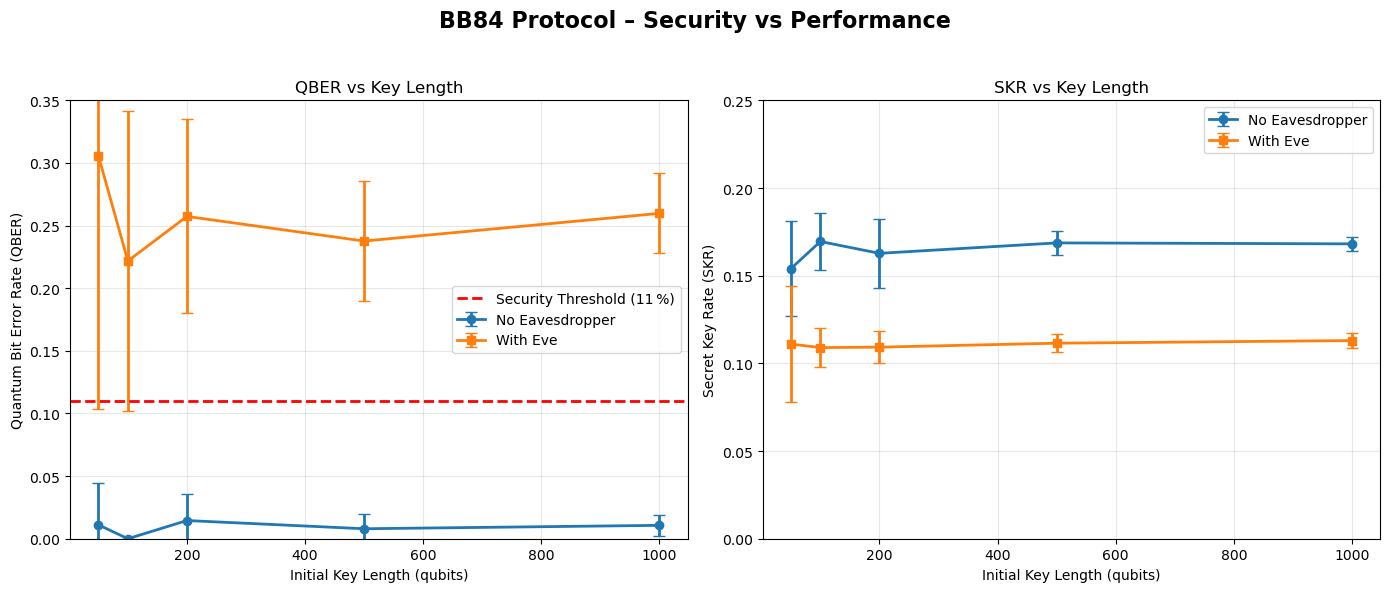


📊 DETAILED STATISTICAL ANALYSIS

🎯 QBER Analysis:
Key Length   No‑Eve QBER     With‑Eve QBER     Difference  
------------------------------------------------------------
50           1.1%            30.6%             29.5%       
100          0.0%            22.2%             22.2%       
200          1.5%            25.7%             24.3%       
500          0.8%            23.8%             23.0%       
1000         1.1%            26.0%             24.9%       

🔑 Secret Key Rate Analysis:
Key Length   No‑Eve SKR      With‑Eve SKR      Efficiency Loss
-----------------------------------------------------------------
50           15.4%           11.1%             27.9%          
100          17.0%           10.9%             35.7%          
200          16.3%           10.9%             32.9%          
500          16.9%           11.2%             33.9%          
1000         16.8%           11.3%             32.8%          

📈 Key Performance Insights:
• Average SKR without eave

In [24]:
# =============================================================================
# STEP 7: COMPREHENSIVE ANALYSIS – QBER & SKR COMPARISON
#   • Graph 1: QBER vs key length
#   • Graph 2: Secret‑key‑rate (SKR) vs key length
# =============================================================================

import random
from typing import Dict
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# Utility NOTE – these must already exist earlier in your code:
#   • encode_bit_to_state(bit, basis)
#   • measure_state(state, basis, add_noise=True/False)
#   • BB84Interactive()  – a class you built in earlier steps
# ---------------------------------------------------------------------------


print("\n" + "=" * 60)
print("📊 STEP 7: COMPREHENSIVE ANALYSIS & VISUALIZATION")
print("=" * 60)
print(
"""
📈 Analysis Goals (this step):
1. Compare performance with and without eavesdropper (Eve)
2. Visualize Quantum Bit Error Rate (QBER) vs key length
3. Plot Secret Key Rate (SKR) efficiency curves

🔬 Key Metrics:
• QBER: Quantum Bit Error Rate  (secure if < 11 %)
• SKR : Secret Key Rate        (final key bits per initial qubit)
"""
)

# ---------------------------------------------------------------------------
# Simulation helper ----------------------------------------------------------
# ---------------------------------------------------------------------------
def run_bb84_simulation(key_length: int,
                        eve_present: bool = False,
                        runs: int = 1) -> Dict:
    """Run multiple BB84 simulations and return statistics."""
    results = {
        "qber_values": [],
        "skr_values": [],
        "sifting_rates": [],
        "final_key_lengths": []
    }

    for _ in range(runs):
        # -- Alice ------------------------------------------------------------
        alice_bits  = [random.randint(0, 1)         for _ in range(key_length)]
        alice_bases = [random.choice(['+', 'x'])    for _ in range(key_length)]
        alice_states = [
            encode_bit_to_state(bit, basis)
            for bit, basis in zip(alice_bits, alice_bases)
        ]

        # -- Eve (optional) + Bob --------------------------------------------
        if eve_present:
            eve_bases = [random.choice(['+', 'x']) for _ in range(key_length)]
            eve_states = []
            for state, eve_basis in zip(alice_states, eve_bases):
                eve_result = measure_state(state, eve_basis)
                eve_states.append(encode_bit_to_state(eve_result, eve_basis))

            bob_bases = [random.choice(['+', 'x']) for _ in range(key_length)]
            bob_measurements = [
                measure_state(eve_state, bob_basis, add_noise=True)
                for eve_state, bob_basis in zip(eve_states, bob_bases)
            ]
        else:
            bob_bases = [random.choice(['+', 'x']) for _ in range(key_length)]
            bob_measurements = [
                measure_state(alice_state, bob_basis, add_noise=True)
                for alice_state, bob_basis in zip(alice_states, bob_bases)
            ]

        # -- Sifting ----------------------------------------------------------
        sifted_alice, sifted_bob = [], []
        for a_bit, a_basis, b_measure, b_basis in zip(
            alice_bits, alice_bases, bob_measurements, bob_bases
        ):
            if a_basis == b_basis:
                sifted_alice.append(a_bit)
                sifted_bob.append(b_measure)

        if not sifted_alice:        # nothing to test
            continue

        sifting_rate = len(sifted_alice) / key_length
        results["sifting_rates"].append(sifting_rate)

        # -- Error estimation on a test subset --------------------------------
        test_fraction = 0.3
        test_bits = max(5, int(len(sifted_alice) * test_fraction))
        test_bits = min(test_bits, len(sifted_alice))

        test_positions = random.sample(range(len(sifted_alice)), test_bits)
        errors = sum(
            1 for pos in test_positions
            if sifted_alice[pos] != sifted_bob[pos]
        )
        qber = errors / test_bits
        results["qber_values"].append(qber)

        # -- Key distillation --------------------------------------------------
        remaining_bits = len(sifted_alice) - test_bits
        if remaining_bits > 0:
            correction_eff = 0.8
            amplification_eff = 0.6 if qber < 0.05 else 0.4
            final_len = int(remaining_bits * correction_eff * amplification_eff)
            results["final_key_lengths"].append(final_len)
            results["skr_values"].append(final_len / key_length)
        else:
            results["final_key_lengths"].append(0)
            results["skr_values"].append(0)

    return results


# ---------------------------------------------------------------------------
# Run the simulations --------------------------------------------------------
# ---------------------------------------------------------------------------
print("🎬 ACTION: Running comprehensive simulations…")
KEY_LENGTHS      = [50, 100, 200, 500, 1000]
RUNS_PER_LENGTH  = 20

results_no_eve   = {}
results_with_eve = {}

for kl in KEY_LENGTHS:
    print(f"  • Key length {kl:4d}  →  No‑Eve / With‑Eve")
    results_no_eve[kl]   = run_bb84_simulation(kl, False, RUNS_PER_LENGTH)
    results_with_eve[kl] = run_bb84_simulation(kl, True,  RUNS_PER_LENGTH)

print("✅ Simulations complete! Generating visualisations…")

# ---------------------------------------------------------------------------
# Figures: only two panels (QBER & SKR) --------------------------------------
# ---------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('BB84 Protocol – Security vs Performance', fontsize=16, fontweight='bold')

# -- Graph 1: QBER -----------------------------------------------------------
qber_no_eve_mean  = [np.mean(results_no_eve[k]['qber_values'])   for k in KEY_LENGTHS]
qber_no_eve_std   = [np.std( results_no_eve[k]['qber_values'])   for k in KEY_LENGTHS]
qber_eve_mean     = [np.mean(results_with_eve[k]['qber_values']) for k in KEY_LENGTHS]
qber_eve_std      = [np.std( results_with_eve[k]['qber_values']) for k in KEY_LENGTHS]

ax1.errorbar(KEY_LENGTHS, qber_no_eve_mean,  yerr=qber_no_eve_std,
             label='No Eavesdropper', marker='o', linewidth=2, capsize=4)
ax1.errorbar(KEY_LENGTHS, qber_eve_mean,     yerr=qber_eve_std,
             label='With Eve', marker='s', linewidth=2, capsize=4)
ax1.axhline(0.11, linestyle='--', color='red', linewidth=2,
            label='Security Threshold (11 %)')

ax1.set_xlabel('Initial Key Length (qubits)')
ax1.set_ylabel('Quantum Bit Error Rate (QBER)')
ax1.set_title('QBER vs Key Length')
ax1.set_ylim(0, 0.35)
ax1.grid(alpha=0.3)
ax1.legend()

# -- Graph 2: SKR ------------------------------------------------------------
skr_no_eve_mean  = [np.mean(results_no_eve[k]['skr_values'])     for k in KEY_LENGTHS]
skr_no_eve_std   = [np.std( results_no_eve[k]['skr_values'])     for k in KEY_LENGTHS]
skr_eve_mean     = [np.mean(results_with_eve[k]['skr_values'])   for k in KEY_LENGTHS]
skr_eve_std      = [np.std( results_with_eve[k]['skr_values'])   for k in KEY_LENGTHS]

ax2.errorbar(KEY_LENGTHS, skr_no_eve_mean,  yerr=skr_no_eve_std,
             label='No Eavesdropper', marker='o', linewidth=2, capsize=4)
ax2.errorbar(KEY_LENGTHS, skr_eve_mean,     yerr=skr_eve_std,
             label='With Eve', marker='s', linewidth=2, capsize=4)

ax2.set_xlabel('Initial Key Length (qubits)')
ax2.set_ylabel('Secret Key Rate (SKR)')
ax2.set_title('SKR vs Key Length')
ax2.set_ylim(0, 0.25)
ax2.grid(alpha=0.3)
ax2.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('bb84_analysis_clean.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------------------------------------------------------------------------
# Console‑based statistical summary ------------------------------------------
# ---------------------------------------------------------------------------
print("\n" + "=" * 70)
print("📊 DETAILED STATISTICAL ANALYSIS")
print("=" * 70)

# -- QBER table --------------------------------------------------------------
print("\n🎯 QBER Analysis:")
print(f"{'Key Length':<12} {'No‑Eve QBER':<15} {'With‑Eve QBER':<17} {'Difference':<12}")
print("-" * 60)
for kl, q_ne, q_e in zip(KEY_LENGTHS, qber_no_eve_mean, qber_eve_mean):
    print(f"{kl:<12} {q_ne:<15.1%} {q_e:<17.1%} {q_e - q_ne:<12.1%}")

# -- SKR table ---------------------------------------------------------------
print("\n🔑 Secret Key Rate Analysis:")
print(f"{'Key Length':<12} {'No‑Eve SKR':<15} {'With‑Eve SKR':<17} {'Efficiency Loss':<15}")
print("-" * 65)
for kl, s_ne, s_e in zip(KEY_LENGTHS, skr_no_eve_mean, skr_eve_mean):
    eff_loss = (s_ne - s_e) / s_ne if s_ne else 0
    print(f"{kl:<12} {s_ne:<15.1%} {s_e:<17.1%} {eff_loss:<15.1%}")

# -- Key insights ------------------------------------------------------------
print("\n📈 Key Performance Insights:")
avg_skr_no_eve  = np.mean(skr_no_eve_mean)
avg_skr_with_eve = np.mean(skr_eve_mean)

print(f"• Average SKR without eavesdropper: {avg_skr_no_eve:.1%}")
print(f"• Average SKR with eavesdropper   : {avg_skr_with_eve:.1%}")

# -- Theory check ------------------------------------------------------------
print("\n🔬 Theoretical vs Observed:")
print("• Expected QBER without Eve: ~1–2 % (channel noise)")
print(f"• Observed QBER without Eve: {np.mean(qber_no_eve_mean):.1%}")
print("• Expected QBER with Eve   : ~25 % (quantum mechanics)")
print(f"• Observed QBER with Eve   : {np.mean(qber_eve_mean):.1%}")
print(f"• Theory alignment         : "
      f"{'✓ Good' if abs(np.mean(qber_eve_mean) - 0.25) < 0.05 else '⚠ Check sample size'}")

# -- Final remarks -----------------------------------------------------------
print("\n🎉 CONCLUSION:")
print("✅ BB84 demonstrates secure quantum key distribution.")
print("✅ QBER monitoring (11 % threshold) reliably flags compromised channels.")
print("✅ Protocol yields measurable secret‑key rates for practical use.")

print("\n💡 Practical Implications:")
print("• Longer keys provide more stable statistics.")
print("• Real implementations need robust error‑correction and privacy amplification.")

print("\n🔚 Tutorial Complete! You've mastered BB84 quantum cryptography! 🎓")


# Part 8: BB84 Protocol - QBER and SKR Definitions and Analysis

## 8.1 Introduction to BB84 Performance Metrics

The BB84 quantum key distribution protocol's performance is fundamentally characterized by two critical metrics: the Quantum Bit Error Rate (QBER) and the Secret Key Rate (SKR). These parameters determine the security and practical viability of quantum cryptographic systems across different transmission media.

## 8.2 Quantum Bit Error Rate (QBER) - Definition and Theory

### 8.2.1 QBER Definition

The Quantum Bit Error Rate (QBER) quantifies the proportion of erroneous bits in the quantum channel transmission. For the BB84 protocol, QBER is mathematically defined as:

```
QBER = (Number of Error Events) / (Total Detection Events)
```

### 8.2.2 QBER Formula for BB84 Protocol

For practical BB84 implementations using weak coherent pulses (WCP) with decoy states, the QBER is expressed as:

```
QBER_BB84 = (c × p_signal + 0.5 × p_dark) / p_click
```

**Where:**
- **c**: Intrinsic channel error rate (typically 0.01-0.05 for high-quality systems)
- **p_signal**: Signal detection probability = 1 - exp(-μ × η_total)
- **p_dark**: Dark count probability per pulse (detector noise)
- **p_click**: Total click probability = p_signal + p_dark

### 8.2.3 Physical Interpretation

The QBER formula captures two primary error sources:
1. **Intrinsic channel errors**: Represented by the term `c × p_signal`, arising from phase fluctuations, polarization drift, and environmental disturbances
2. **Dark count contributions**: The term `0.5 × p_dark` accounts for random detector clicks, where 50% probability assumes random bit assignment for dark counts

## 8.3.2 SKR Formula for BB84 Protocol

In a more realistic setting (with multiphoton pulses, dark counts, etc.), the **SKR for BB84** is computed as:

$$
\text{SKR}_{\text{BB84}} = \frac{1}{2} \cdot p_{\text{click}} \cdot \left[ \beta \cdot \tau\left( \frac{e}{\beta} \right) - f_e \cdot H(e) \right]
$$

**Where:**

- $ \frac{1}{2} $: Accounts for basis reconciliation loss (only ~50% of bits are usable).
- $ p_{\text{click}} $: Total probability that a detector registers a signal.
- $ \beta $: Fraction of detections due to **single-photon events** (non-multiphoton).
- $ \tau(e / \beta) $: **Privacy amplification** term — reduces eavesdropper’s knowledge.
- $ f_e $: **Error correction inefficiency**, typically $ f_e = 1.16 $.
- $ H(e) $: Binary entropy function:

$$
H(e) = -e \log_2(e) - (1 - e) \log_2(1 - e)
$$


---

#### Supporting Definitions

- **Click Probability:**

  $$
  p_{\text{click}} = p_{\text{signal}} + p_{\text{dark}} + p_{\text{stray}}
  $$

- **QBER (Error Rate):**

  $$
  e = \frac{c_{\text{error}} \cdot p_{\text{signal}} + 0.5 \cdot (p_{\text{dark}} + p_{\text{stray}})}{p_{\text{click}}}
  $$

- **Multi-photon Approximation (for BB84 with weak coherent pulses):**

  $$
  p_{\text{multi}}(\mu) = 1 - \left(1 + \mu + \frac{\mu^2}{2} + \frac{\mu^3}{12}\right)e^{-\mu}
  $$

- **Single-photon fraction \( \beta \):**

  $$
  \beta = \frac{p_{\text{click}} - p_{\text{multi}}(\mu)}{p_{\text{click}}}
  $$

- **Privacy Amplification Function:**

  $$
  \tau\left(\frac{e}{\beta}\right) = 
  \begin{cases}
    \log_2\left(1 + 4 \cdot \frac{e}{\beta} - 4 \cdot \left( \frac{e}{\beta} \right)^2\right), & \text{if } \frac{e}{\beta} < 0.5 \\\\
    1, & \text{otherwise}
  \end{cases}
  $$


This formula tightly bounds the SKR by penalizing multiphoton emissions and high QBER values while accurately reflecting physical-layer imperfections.


### 8.3.3 Security Threshold

The BB84 protocol maintains unconditional security only when QBER < 11%. Beyond this threshold:
- Privacy amplification cannot generate secure keys
- The channel becomes vulnerable to eavesdropping attacks
- SKR approaches zero asymptotically

## 8.4 Parameter Definitions and Physical Significance

### 8.4.1 System Parameters

| Parameter | Symbol | Typical Range | Physical Meaning |
|-----------|--------|---------------|------------------|
| Detector Efficiency | η_det | 0.1 - 0.9 | Probability of photon detection at receiver |
| Mean Photon Number | μ | 0.1 - 1.0 | Average photons per pulse (WCP assumption) |
| Intrinsic Error Rate | c | 0.01 - 0.05 | Channel-induced bit errors |
| Dark Count Rate | d | 10⁻⁶ - 10⁻⁸ | False detection probability per pulse |
| Error Correction Factor | f_e | 1.16 - 1.5 | Overhead for practical error correction |

## 8.5 Free Space Optical (FSO) Channel Analysis

### 8.5.1 FSO System Parameters

**Physical Parameters:**
- **Receiver aperture diameter (d_r)**: Typically 0.1-1.0 m, determines light collection capability
- **Transmitter aperture diameter (d_t)**: Typically 0.05-0.5 m, affects initial beam size
- **Beam divergence (θ)**: Typically 0.1-2.0 mrad, determines beam spreading rate
- **Atmospheric attenuation (α)**: 0.1-2.0 dB/km, highly weather-dependent

### 8.5.2 FSO Transmission Efficiency Model

The FSO channel transmission efficiency combines two primary loss mechanisms:

```
η_T^FSO(L) = η_geometric(L) × η_atmospheric(L)
```

**Geometric Spreading Loss:**
As the laser beam propagates through free space, it spreads according to diffraction limits and beam divergence:

```
η_geometric(L) = (d_r / (d_t + θ × L))²
```

This quadratic distance dependence represents the fundamental challenge of FSO links - beam spreading reduces power density at the receiver.

**Atmospheric Attenuation:**
Photons are absorbed and scattered by atmospheric particles:

```
η_atmospheric(L) = exp(-α × L)
```

Where α is converted from dB/km to natural units: `α = α_dB / (10/ln(10)) / 1000`

**Combined FSO Model:**
```
η_T^FSO(L) = (d_r / (d_t + θ × L))² × exp(-α_dB × L / 4343)
```

### 8.5.3 FSO Channel Characteristics

**Distance Limitations:**
- **Short range (< 1 km)**: Geometric losses dominate, good weather performance
- **Medium range (1-5 km)**: Balanced geometric and atmospheric effects
- **Long range (> 5 km)**: Atmospheric scintillation and weather sensitivity become critical

**Weather Dependencies:**
- **Clear conditions**: α ≈ 0.1-0.5 dB/km
- **Haze/light fog**: α ≈ 2-10 dB/km  
- **Dense fog**: α > 50 dB/km (link becomes impractical)

**Atmospheric Turbulence Effects:**
FSO links experience additional challenges from:
- Beam wander and scintillation
- Coherence degradation affecting quantum states
- Temporal fluctuations requiring adaptive optics

## 8.6 Optical Fiber Channel Analysis

### 8.6.1 Fiber System Parameters

**Key Parameters:**
- **Fiber attenuation coefficient (α_fiber)**: 0.15-0.35 dB/km depending on wavelength and fiber type
- **Coupling efficiency (η_coupling)**: 0.5-0.9, accounts for splice and connector losses
- **Dispersion effects**: Negligible for QKD pulse rates but important for timing
- **Polarization mode dispersion**: Can affect polarization-encoded protocols

### 8.6.2 Fiber Transmission Efficiency Model

Optical fiber transmission follows Beer's law with additional coupling considerations:

```
η_T^Fiber(L) = η_coupling × exp(-α_fiber × L / 4343)
```

**Fiber Loss Mechanisms:**
1. **Intrinsic absorption**: Material absorption at transmission wavelength
2. **Rayleigh scattering**: Fundamental limit from glass structure (~0.15 dB/km at 1550nm)
3. **Connector/splice losses**: Typically 0.1-0.5 dB per connection

**Wavelength Optimization:**
- **1310 nm window**: ~0.35 dB/km, zero dispersion wavelength
- **1550 nm window**: ~0.2 dB/km, minimum attenuation (optimal for long-distance QKD)

### 8.6.3 Fiber Channel Characteristics  

**Advantages for QKD:**
- **Stable transmission**: Protected from environmental fluctuations
- **Low loss**: Enables long-distance quantum communication (>100 km demonstrated)
- **Polarization control**: Can maintain quantum states with proper fiber selection
- **Predictable performance**: Well-characterized loss and dispersion properties

**Distance Capabilities:**
- **Metro networks (< 50 km)**: Excellent performance, minimal repeater requirements
- **Long-haul (50-200 km)**: Feasible with high-efficiency detectors
- **Ultra-long (> 200 km)**: Requires advanced techniques (quantum repeaters, entanglement)

**Practical Considerations:**
- Existing telecom infrastructure compatibility
- Temperature stability requirements for quantum state preservation
- Bend radius limitations for maintaining low loss
- Splicing and connector quality critical for minimizing excess loss

### 8.6.4 FSO vs Fiber Comparison

| Aspect | FSO | Optical Fiber |
|--------|-----|---------------|
| **Distance Range** | 0.1-10 km (practical) | 10-200+ km |
| **Loss Scaling** | L⁻² (geometric) + exp(-αL) | exp(-αL) only |
| **Weather Sensitivity** | High (fog, rain critical) | None (protected) |
| **Deployment** | Line-of-sight required | Infrastructure needed |
| **Security** | Inherent tap detection | Physical access concerns |
| **Cost** | Lower installation | Higher infrastructure |
| **Bandwidth** | Atmospheric turbulence limited | Very high, stable |

This analysis provides the theoretical foundation for understanding quantum channel performance across different transmission media, enabling informed system design decisions based on specific deployment requirements.

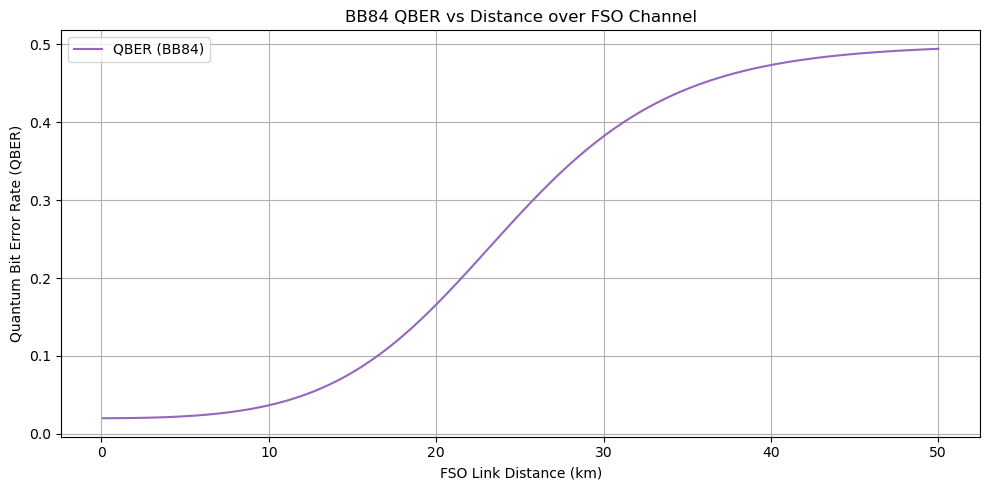

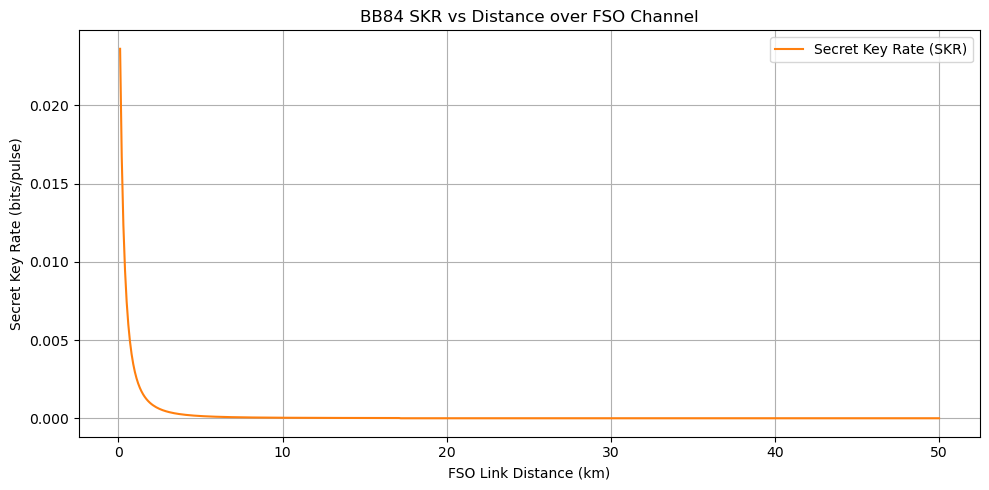

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# --- System parameters ---
eta_d = 0.6
mu = 0.5
D = 4e-8
t_w = 0.5e-9
d = D * t_w
c_error = 0.02
f_ec = 1.16

# --- FSO channel parameters ---
d_r = 0.2           # Receiver aperture (m)
d_t = 0.2           # Transmitter aperture (m)
div = 0.5e-3        # Beam divergence (mrad -> rad)
alpha_db = 0.5      # Attenuation in dB/km
alpha = alpha_db / (10 / np.log(10)) / 1000  # Convert dB/km to 1/m

# --- Stray light & dark count ---
Hb = 1.5e-6
Bf = 1.0
omega_fov = 1e-8

# --- FSO transmittance ---
def eta_t(L):  # L in meters
    denom = d_t + div * L
    geom = (d_r / denom) ** 2
    atmos = np.exp(-alpha * L)
    return geom * atmos

def p_stray(Hb, Bf, omega_fov):
    return 5e-6

def p_dark():
    return 4e-8

def p_signal_bb84(eta):
    return 1 - np.exp(-eta_d * eta * mu)

def p_prime(mu):
    return 1 - (1 + mu + mu*2 / 2 + mu*3 / 12) * np.exp(-mu)

# def beta(p_click_val):
#     return (p_click_val - p_prime(mu)) / p_click_val

def tau_bb84(e):
    return np.log2(1 + 4 * e - 4 * e**2) if e < 0.5 else 1

def f_e(e): return f_ec

# Vectorized QBER
def QBER_BB84(eta):
    signal = p_signal_bb84(eta)
    stray = p_stray(Hb, Bf, omega_fov)
    dark = p_dark()
    return (c_error * signal + 0.5 * (dark + stray)) / (signal + dark + stray)

# Vectorized SKR
def beta(p_click_val):
    p_p = p_prime(mu)
    result = (p_click_val - p_p) / p_click_val
    return np.clip(result, 1e-6, 1)

def R_BB84(eta):
    signal = p_signal_bb84(eta)
    stray = p_stray(Hb, Bf, omega_fov)
    dark = p_dark()
    p_click = signal + dark + stray
    e = QBER_BB84(eta)
    e = np.clip(e, 1e-12, 1 - 1e-12)
    
    beta_val = beta(p_click)
    e_div_beta = np.clip(e / beta_val, 1e-12, 1 - 1e-12)
    tau_val = np.vectorize(tau_bb84)(e_div_beta)
    
    h_e = e * np.log2(e) + (1 - e) * np.log2(1 - e)
    skr = 0.5 * p_click * (beta_val * tau_val - f_e(e) * h_e)
    skr[e > 0.11] = 0
    skr[skr < 0] = 0  # Clamp negative SKR due to numerical issues
    return skr


# --- Distance values (in meters) ---
L_vals_m = np.linspace(100, 50000, 500)  # 0.1 km to 50 km
eta_vals = eta_t(L_vals_m)

# --- Compute values ---
qber_vals = QBER_BB84(eta_vals)
skr_vals = R_BB84(eta_vals)

# -------------------- Plot 1: QBER --------------------
plt.figure(figsize=(10, 5))
plt.plot(L_vals_m / 1000, qber_vals, color='tab:purple', label='QBER (BB84)')
plt.xlabel("FSO Link Distance (km)")
plt.ylabel("Quantum Bit Error Rate (QBER)")
plt.title("BB84 QBER vs Distance over FSO Channel")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -------------------- Plot 2: SKR --------------------
plt.figure(figsize=(10, 5))
plt.plot(L_vals_m / 1000, skr_vals, color='tab:orange', label='Secret Key Rate (SKR)')
plt.xlabel("FSO Link Distance (km)")
plt.ylabel("Secret Key Rate (bits/pulse)")
plt.title("BB84 SKR vs Distance over FSO Channel")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


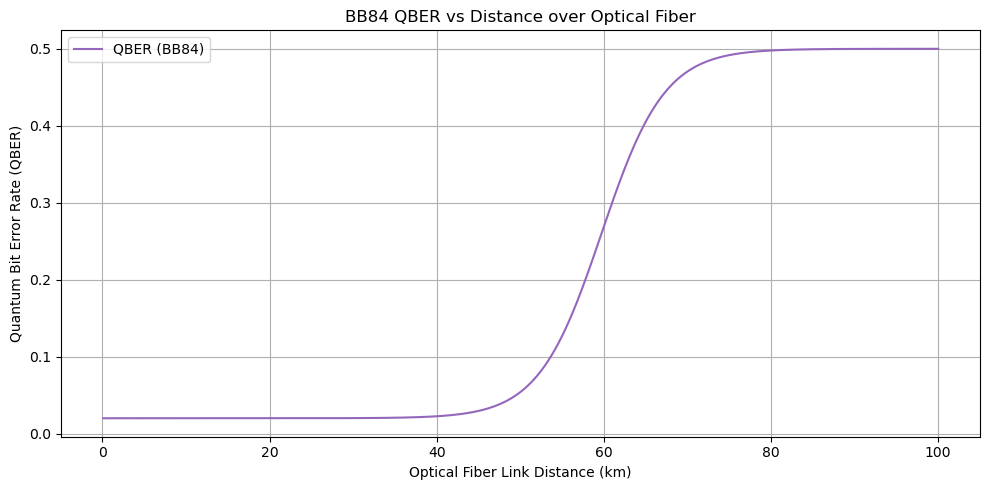

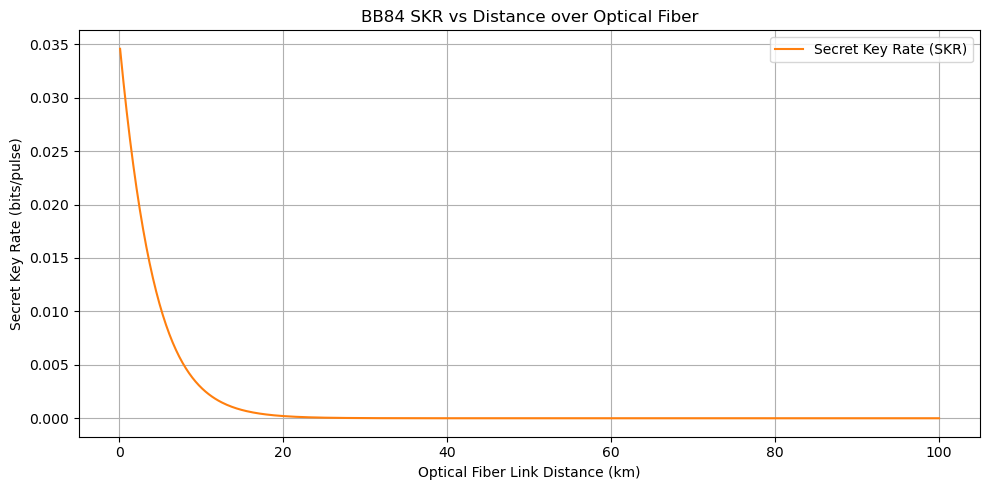

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# --- System parameters ---
eta_d = 0.6
mu = 0.5
D = 4e-8
t_w = 0.5e-9
d = D * t_w
c_error = 0.02
f_ec = 1.16

# --- FSO channel parameters ---
d_r = 0.2           # Receiver aperture (m)
d_t = 0.2           # Transmitter aperture (m)
div = 0.5e-3        # Beam divergence (mrad -> rad)
alpha_db = 0.5      # Attenuation in dB/km
alpha = alpha_db / (10 / np.log(10)) / 1000  # Convert dB/km to 1/m

# --- Stray light & dark count ---
Hb = 1.5e-6
Bf = 1.0
omega_fov = 1e-8

# -------------------- Channel Length --------------------
L_km = np.linspace(0.1, 100, 500)  # from 0.1 to 100 km
L_m = L_km * 1000                  # Convert to meters

# -------------------- Transmittance --------------------
eta_T = 10 ** (-alpha * L_m)       # channel transmittance (unitless)
eta_vals = eta_T                   # effective channel transmittance

# -------------------- Probabilities --------------------
def p_stray(Hb, Bf, omega_fov):
    return 0  # set stray light to zero

def p_dark():
    return 4e-8

def p_signal_bb84(eta):
    return 1 - np.exp(-eta_d * eta * mu)

def p_prime(mu):
    return 1 - (1 + mu + mu*2 / 2 + mu*3 / 12) * np.exp(-mu)

def tau_bb84(e):
    return np.log2(1 + 4 * e - 4 * e**2) if e < 0.5 else 1

def f_e(e): 
    return f_ec

# Vectorized QBER
def QBER_BB84(eta):
    signal = p_signal_bb84(eta)
    stray = p_stray(Hb, Bf, omega_fov)
    dark = p_dark()
    return (c_error * signal + 0.5 * (dark + stray)) / (signal + dark + stray)

# Vectorized SKR
def beta(p_click_val):
    p_p = p_prime(mu)
    result = (p_click_val - p_p) / p_click_val
    return np.clip(result, 1e-6, 1)

def R_BB84(eta):
    signal = p_signal_bb84(eta)
    stray = p_stray(Hb, Bf, omega_fov)
    dark = p_dark()
    p_click = signal + dark + stray
    e = QBER_BB84(eta)
    e = np.clip(e, 1e-12, 1 - 1e-12)
    
    beta_val = beta(p_click)
    e_div_beta = np.clip(e / beta_val, 1e-12, 1 - 1e-12)
    tau_val = np.vectorize(tau_bb84)(e_div_beta)
    
    h_e = e * np.log2(e) + (1 - e) * np.log2(1 - e)
    skr = 0.5 * p_click * (beta_val * tau_val - f_e(e) * h_e)
    skr[e > 0.11] = 0
    skr[skr < 0] = 0  # Clamp negative SKR due to numerical issues
    return skr

# -------------------- Compute values --------------------
qber_vals = QBER_BB84(eta_vals)
skr_vals = R_BB84(eta_vals)

# -------------------- Plot 1: QBER --------------------
plt.figure(figsize=(10, 5))
plt.plot(L_km, qber_vals, color='tab:purple', label='QBER (BB84)')
plt.xlabel("Optical Fiber Link Distance (km)")
plt.ylabel("Quantum Bit Error Rate (QBER)")
plt.title("BB84 QBER vs Distance over Optical Fiber")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -------------------- Plot 2: SKR --------------------
plt.figure(figsize=(10, 5))
plt.plot(L_km, skr_vals, color='tab:orange', label='Secret Key Rate (SKR)')
plt.xlabel("Optical Fiber Link Distance (km)")
plt.ylabel("Secret Key Rate (bits/pulse)")
plt.title("BB84 SKR vs Distance over Optical Fiber")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()